# Data exploration : structure temporelle

In [ ]:
# Import de librairies
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Structure du signal temporel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
# Confirmation d'être à la racine du dossier
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(project_root)

In [3]:
# Import data
df = pd.read_csv("data/processed/exploratory_solar_dataset.csv", sep=";", index_col=0)

In [4]:
# Gestion de la première colonne
df.index = pd.to_datetime(df.index, utc=True).tz_convert("Europe/Paris")

In [5]:
df.head()

,Solaire (MW),temperature_2m_run_13,sunshine_duration_run_13,is_day_run_13,relative_humidity_2m_run_13,precipitation_run_13,surface_pressure_run_13,cloud_cover_run_13,wind_speed_10m_run_13,wind_direction_10m_run_13,...,direct_normal_irradiance_delta_minmax,direct_normal_irradiance_std,shortwave_radiation_delta_minmax,shortwave_radiation_std,global_tilted_irradiance_delta_minmax,global_tilted_irradiance_std,terrestrial_radiation_delta_minmax,terrestrial_radiation_std,apparent_temperature_delta_minmax,apparent_temperature_std
2023-02-01 01:00:00+01:00,0.0,3.136,0.0,0.0,99.29538,0.0,974.73560,100.0,6.989936,304.50858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2179,2.4873
2023-02-01 02:00:00+01:00,0.0,3.436,0.0,0.0,99.64800,0.0,974.41766,100.0,8.089994,302.27563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8490,2.3038
2023-02-01 03:00:00+01:00,0.0,3.436,0.0,0.0,99.29709,0.0,974.41766,100.0,9.178235,281.30990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6066,1.9406
2023-02-01 04:00:00+01:00,0.0,3.436,0.0,0.0,98.59856,0.1,974.04000,100.0,9.693296,291.80148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0427,1.7014
2023-02-01 05:00:00+01:00,0.0,3.436,0.0,0.0,99.29709,0.6,974.04000,100.0,10.587918,305.31128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8898,1.7487


# Données manquantes

In [6]:
print(df["Solaire (MW)"].isna().sum())

2


Seul deux valeurs sont manquantes. Un simple drop suffit.

In [7]:
df = df.dropna()
print(df["Solaire (MW)"].isna().sum())

0


## Structure de la série temporelle production solaire (Solaire (MW))

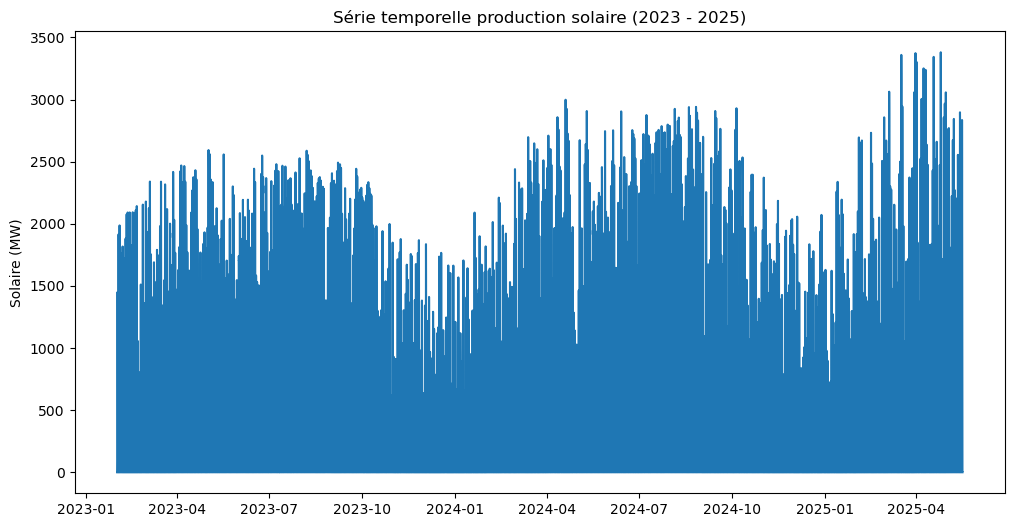

In [8]:
fig = plt.figure(figsize=(12, 6))
plt.title("Série temporelle production solaire (2023 - 2025)")
solar_ts = df["Solaire (MW)"]
sns.lineplot(solar_ts)
plt.show()

Il peut déjà être remarqué une **dérive positive à l'échelle annuelle** (sûrement due à l'augmentation de la capacité totale installée sur le territoire), ainsi qu'une saisonnalité annuelle (saison hiver-été), que l'on peut intuitivement corréler l'irradiance. Nous pouvons de plus regarder la structure de la série temporelle pour 72 heures. On peut s'attendre à une saisonnalité journalière corrélée au cycle solaire.

<Axes: title={'center': 'Série temporelle production solaire (3 jours)'}, ylabel='Solaire (MW)'>

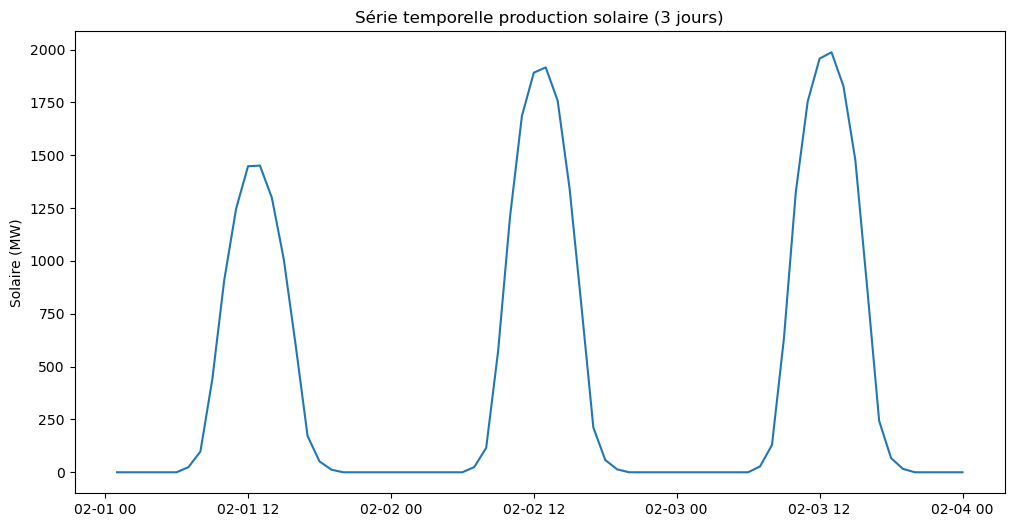

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.title("Série temporelle production solaire (3 jours)")
sns.lineplot(solar_ts[:72])

Nous observons évidemment une saisonnalité journalière correspondant au cycle solaire. Regardons maintenant l'autocorrélation et l'autocorrélation partielle de la série sur 96 lags ( 4 jours).

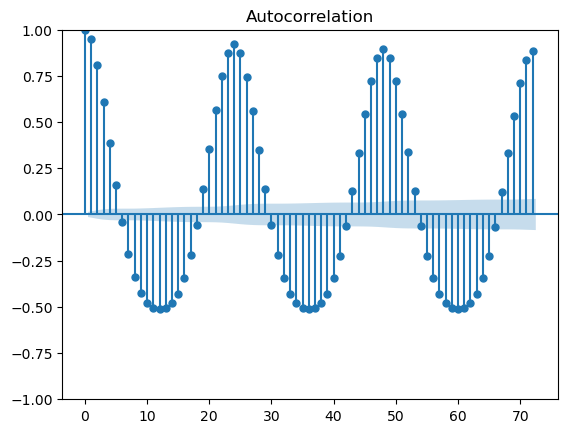

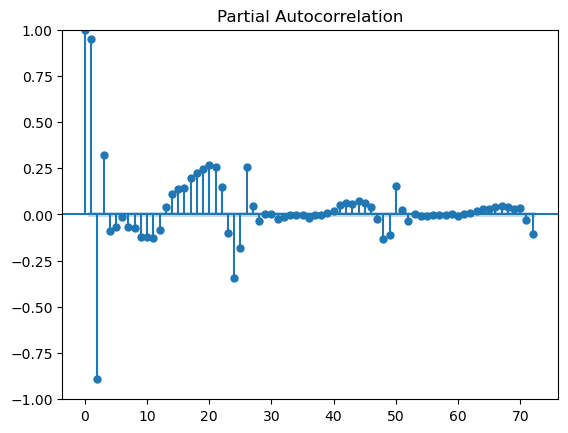

In [19]:
plot_acf(solar_ts, lags=72)
plot_pacf(solar_ts, lags=72)
plt.show()

Il semble nécessaire d'effectuer une différenciation saisonnière d'ordre 24 pour regarder la stationnarité de la série et l'ACF/PACF ensuite pour les ordres MA et AR.

In [26]:
# Différenciation saisonnière d'ordre 24
solar_ts_diff24 = solar_ts.diff(24).dropna()

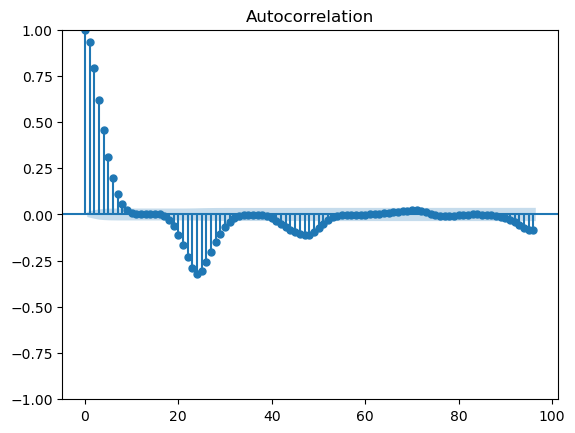

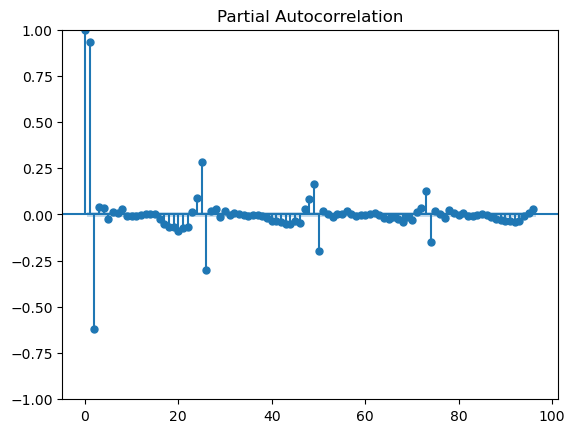

In [31]:
plot_acf(solar_ts_diff24, lags=96)
plot_pacf(solar_ts_diff24, lags=96)
plt.show()

In [ ]:
adfuller(solar_ts_diff24)

(np.float64(-28.20952763449581),
 0.0,
 46,
 19991,
 {'1%': np.float64(-3.4306771542132264),
  '5%': np.float64(-2.8616845906605723),
  '10%': np.float64(-2.566846961658408)},
 np.float64(229694.2407444884))

Nous pouvons remarquer que la différenciation saisonnière a bien marché et a supprimé complètement la saisonnalité principale. de plus le test d'adfuller indique que la série est stationnaire.
Concernant l'ordre AR : 
- L'autocorrélation partielle indique une coupure nette après le lag 1, on peut donc proposer en première approche un modèle AR(1) ;
- L'autoccorélation décroit rapidement en dessous de 0.25 après 10 lags, et le pattern stationnaire a été supprimé. Cela ressemble a une structure avec moyenne mobile (MA).

Nous pouvons donc proposer en première approche le modèle suivant : **SARIMAX(1,0,Q)x(0,1,0)_(24)**, que nous pouvons améliorer avec une méthode itérative basé sur une minimisation de l'AIC.